In [2]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib as plt
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Assignment3_IR/IR-assignment-3-data.txt",header=None,delimiter=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239093 entries, 0 to 239092
Data columns (total 1 columns):
0    239093 non-null object
dtypes: object(1)
memory usage: 1.8+ MB


In [5]:
df.head()

,0
0,0 qid:4 1:3 2:0 3:2 4:0 5:3 6:1 7:0 8:0.666667...
1,0 qid:4 1:3 2:0 3:3 4:0 5:3 6:1 7:0 8:1 9:0 10...
2,0 qid:4 1:3 2:0 3:2 4:0 5:3 6:1 7:0 8:0.666667...
3,0 qid:4 1:3 2:0 3:3 4:0 5:3 6:1 7:0 8:1 9:0 10...
4,1 qid:4 1:3 2:0 3:3 4:0 5:3 6:1 7:0 8:1 9:0 10...


In [3]:
with open('Assignment3_IR/IR-assignment-3-data.txt','r') as file:
    reader = file.readlines()
    

In [4]:
relevance_score=[]
for i in reader:
    read = i.split(" ")
    if read[1] == 'qid:4':
        relevance_score.append(int(read[0]))

In [5]:
len(relevance_score)
print(relevance_score)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]


In [6]:
dic={}
i=0
j=1
while(i<len(relevance_score)):
    dic[j]=relevance_score[i]
    i=i+1
    j=j+1

In [7]:
print((dic))

{1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 3, 9: 0, 10: 0, 11: 1, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 1, 19: 2, 20: 2, 21: 1, 22: 2, 23: 2, 24: 0, 25: 1, 26: 2, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 2, 36: 0, 37: 2, 38: 2, 39: 1, 40: 0, 41: 2, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 2, 54: 1, 55: 0, 56: 1, 57: 0, 58: 0, 59: 2, 60: 0, 61: 1, 62: 2, 63: 2, 64: 0, 65: 0, 66: 0, 67: 1, 68: 0, 69: 2, 70: 0, 71: 0, 72: 0, 73: 1, 74: 0, 75: 1, 76: 1, 77: 2, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 1, 84: 1, 85: 1, 86: 1, 87: 0, 88: 0, 89: 1, 90: 0, 91: 2, 92: 0, 93: 1, 94: 0, 95: 0, 96: 0, 97: 1, 98: 0, 99: 0, 100: 1, 101: 2, 102: 1, 103: 0}


In [8]:
sort = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}
sort = [i for i in sort]
print((sort[:3]))

[8, 19, 20]


In [9]:
print(sort)

[8, 19, 20, 22, 23, 26, 35, 37, 38, 41, 53, 59, 62, 63, 69, 77, 91, 101, 5, 7, 11, 14, 18, 21, 25, 30, 33, 39, 54, 56, 61, 67, 73, 75, 76, 83, 84, 85, 86, 89, 93, 97, 100, 102, 1, 2, 3, 4, 6, 9, 10, 12, 13, 15, 16, 17, 24, 27, 28, 29, 31, 32, 34, 36, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 57, 58, 60, 64, 65, 66, 68, 70, 71, 72, 74, 78, 79, 80, 81, 82, 87, 88, 90, 92, 94, 95, 96, 98, 99, 103]


In [10]:
rel_score_0=sum(value== 0.0 for value in dic.values())
rel_score_1=sum(value== 1.0 for value in dic.values())
rel_score_2 = sum(value== 2.0 for value in dic.values())
rel_score_3 = sum(value== 3.0 for value in dic.values())
rel_score_4 = sum(value==4.0 for value in dic.values())

In [11]:
print("score_0: ",rel_score_0)
print("score_1: ",rel_score_1)
print("score_2: ",rel_score_2)
print("score_3: ",rel_score_3)
print("score_4: ",rel_score_4)

score_0:  59
score_1:  26
score_2:  17
score_3:  1
score_4:  0


In [12]:
rel_sorted=sorted(relevance_score,reverse=True)
print(rel_sorted)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
rows=[]
for i in reader:
    read = i.split(" ")
    if read[1] == 'qid:4':
        rows.append(i)
        rows = sorted(rows,key=lambda x:x[0],reverse=True)
        with open('maxdcg_content.txt', 'w') as f:
            for item in rows:
                f.write("%s\n" % item)

In [14]:
f = open('maxdcg_content.txt','r')
data = f.read()
print(data)

3 qid:4 1:3 2:0 3:2 4:1 5:3 6:1 7:0 8:0.666667 9:0.333333 10:1 11:344 12:0 13:19 14:6 15:369 16:14.976692 17:28.949002 18:25.594644 19:28.531344 20:14.972391 21:99 22:0 23:6 24:1 25:106 26:6 27:0 28:0 29:0 30:6 31:51 32:0 33:4 34:1 35:56 36:33 37:0 38:2 39:0.333333 40:35.333333 41:378 42:0 43:2.666667 44:0.222222 45:454.222222 46:0.287791 47:0 48:0.315789 49:0.166667 50:0.287263 51:0.017442 52:0 53:0 54:0 55:0.01626 56:0.148256 57:0 58:0.210526 59:0.166667 60:0.151762 61:0.09593 62:0 63:0.105263 64:0.055556 65:0.095754 66:0.003194 67:0 68:0.007387 69:0.006173 70:0.003336 71:381.086021 72:0 73:45.331988 74:9.586712 75:411.010633 76:49.589179 77:0 78:0 79:0 80:49.59403 81:281.883642 82:0 83:35.956938 84:9.586712 85:309.497726 86:127.028674 87:0 88:15.110663 89:3.195571 90:137.003544 91:11990.030799 92:0 93:231.932187 94:20.423345 95:14878.022216 96:1 97:0 98:0 99:0 100:1 101:0.699343 102:0 103:0.631671 104:0.555497 105:0.688618 106:46.563656 107:0 108:17.431926 109:11.57800 110:46.454896

In [ ]:
without_0 relevance_score = math.factorial(rel_score_1)*math.factorial(rel_score_2)*math.factorial(rel_score_3)*math.factorial(rel_score_4)

In [38]:
rel_0_list=[]
for i in rel_sorted:
    if i == 0:
        rel_0_list.append(i)


59


In [50]:
val = 1
for i in range(1,len(rel_0_list)+1):  
    val+= math.factorial(rel_score_0)/math.factorial(rel_score_0-i) 
print(val)

3.7697980105678033e+80


In [54]:
print("Files possible with arrangement of 0 relevance score: ",val*math.factorial(rel_score_1)*math.factorial(rel_score_2)*math.factorial(rel_score_3)*math.factorial(rel_score_4))

Files possible with arrangement of 0 relevance score:  5.4076132421510985e+121


In [55]:
print("Number of files: ",math.factorial(rel_score_0)*math.factorial(rel_score_1)*math.factorial(rel_score_2)*math.factorial(rel_score_3)*math.factorial(rel_score_4))

Number of files:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


**PART(2)**

AT 50

In [19]:
dictList=[]
for key, value in dic.items():
    dictList.append(int(value))

In [20]:
DCG_50 = 0
for i in range(1,51):
    DCG_1 = (relevance_score[i-1])/(np.log(i+1))
    print(i," ",DCG_1)
    DCG_50 = DCG_50+DCG_1

1   0.0
2   0.0
3   0.0
4   0.0
5   0.5581106265512472
6   0.0
7   0.48089834696298783
8   1.365358839940256
9   0.0
10   0.0
11   0.40242960438184466
12   0.0
13   0.0
14   0.36926937306885504
15   0.0
16   0.0
17   0.0
18   0.3396232718951086
19   0.6676164013906681
20   0.6569174775061022
21   0.32351545314867247
22   0.637857977807602
23   0.6293159608882497
24   0.0
25   0.30692767643013485
26   0.6068261510845583
27   0.0
28   0.0
29   0.0
30   0.29120667621996243
31   0.0
32   0.0
33   0.2835784920513334
34   0.0
35   0.5581106265512472
36   0.0
37   0.5498151554849872
38   0.5459168408187948
39   0.2710850306818168
40   0.0
41   0.535092772838108
42   0.0
43   0.0
44   0.0
45   0.0
46   0.0
47   0.0
48   0.0
49   0.0
50   0.0


In [21]:
print("DCG_50: ",DCG_50)

DCG_50:  10.379472755702539


In [22]:
IDCG_50 = 0
for i in range(1,51):
    IDCG_1 = (rel_sorted[i-1])/(np.log(i+1))
    print(i," ",IDCG_1)
    IDCG_50 = IDCG_50+IDCG_1

1   4.328085122666891
2   1.8204784532536746
3   1.4426950408889634
4   1.2426698691192237
5   1.1162212531024944
6   1.0277966847395015
7   0.9617966939259757
8   0.9102392266268373
9   0.8685889638065035
10   0.8340647828484926
11   0.8048592087636893
12   0.7797424905025602
13   0.7578463633799024
14   0.7385387461377101
15   0.7213475204444817
16   0.7059122477295223
17   0.6919525125223872
18   0.6792465437902172
19   0.33380820069533407
20   0.3284587387530511
21   0.32351545314867247
22   0.318928988903801
23   0.31465798044412485
24   0.31066746727980593
25   0.30692767643013485
26   0.30341307554227914
27   0.3001016285004131
28   0.2969742043733701
29   0.29401410379520604
30   0.29120667621996243
31   0.28853900817779266
32   0.28599966750267436
33   0.2835784920513334
34   0.28126641406272834
35   0.2790553132756236
36   0.2769378934088574
37   0.2749075777424936
38   0.2729584204093974
39   0.2710850306818168
40   0.269282508064391
41   0.267546386419054
42   0.26587258567

In [23]:
print("IDCG_50",IDCG_50)

IDCG_50 27.998739896756508


In [24]:
nDCG_50 = DCG_50/IDCG_50
print("nDCG_50: ", nDCG_50)

nDCG_50:  0.37071213897397365


At Whole Dataset

In [25]:
DCG = 0
for i in range(1,103+1):
    DCG_1 = (relevance_score[i-1])/(np.log(i+1))
    print(i," ",DCG_1)
    DCG = DCG+DCG_1 

1   0.0
2   0.0
3   0.0
4   0.0
5   0.5581106265512472
6   0.0
7   0.48089834696298783
8   1.365358839940256
9   0.0
10   0.0
11   0.40242960438184466
12   0.0
13   0.0
14   0.36926937306885504
15   0.0
16   0.0
17   0.0
18   0.3396232718951086
19   0.6676164013906681
20   0.6569174775061022
21   0.32351545314867247
22   0.637857977807602
23   0.6293159608882497
24   0.0
25   0.30692767643013485
26   0.6068261510845583
27   0.0
28   0.0
29   0.0
30   0.29120667621996243
31   0.0
32   0.0
33   0.2835784920513334
34   0.0
35   0.5581106265512472
36   0.0
37   0.5498151554849872
38   0.5459168408187948
39   0.2710850306818168
40   0.0
41   0.535092772838108
42   0.0
43   0.0
44   0.0
45   0.0
46   0.0
47   0.0
48   0.0
49   0.0
50   0.0
51   0.0
52   0.0
53   0.5013807968779938
54   0.24954251462921184
55   0.0
56   0.2473379469500514
57   0.0
58   0.0
59   0.4884786733519446
60   0.0
61   0.2422988705246811
62   0.48272627661855017
63   0.48089834696298783
64   0.0
65   0.0
66   0.0
67  

In [26]:
print(DCG)

17.799227590651103


In [27]:
IDCG=0
for i in range(1,len(rel_sorted)+1):
    IDCG_1=(rel_sorted[i-1])/(np.log(i+1))
    IDCG=IDCG+IDCG_1

In [28]:
print(IDCG)

27.998739896756508


In [30]:
nDCG = DCG/IDCG
print("nDCG: ",nDCG)

nDCG:  0.6357153091990773


**PART(3)**

In [31]:
feature_75=[]
total_doc=0
for i in reader:
    read = i.split(" ")
    if read[1] == 'qid:4':
        score = read[76].split(':')
        url_score = float(score[1])
        feature_75.append(url_score)

In [32]:
feature_dic ={}
i=0
j=0
while(i<len(feature_75)):
    feature_dic[j]=feature_75[i]
    i=i+1
    j=j+1

In [33]:
sorted_feature = {k: v for k, v in sorted(feature_dic.items(), key=lambda item: item[1],reverse=True)}
newlist = []
for i in sorted_feature.keys():
    newlist.append(i)
print(newlist)
print(len(newlist))

[8, 67, 56, 1, 101, 5, 60, 7, 73, 90, 54, 100, 84, 99, 13, 52, 65, 36, 41, 53, 39, 38, 80, 72, 40, 55, 59, 31, 27, 48, 12, 85, 79, 29, 50, 42, 22, 61, 95, 62, 19, 37, 43, 44, 3, 46, 21, 93, 4, 9, 58, 82, 89, 24, 68, 33, 76, 6, 63, 88, 69, 71, 32, 45, 11, 0, 34, 2, 75, 35, 10, 15, 20, 78, 83, 87, 102, 18, 74, 92, 28, 66, 51, 77, 26, 91, 47, 23, 98, 25, 57, 64, 17, 14, 97, 30, 70, 96, 94, 16, 86, 49, 81]
103


In [34]:
from collections import Counter
k = Counter(feature_dic)
high = k.most_common(int(103))
print(high)

[(8, 972.826451), (67, 612.893205), (56, 571.500533), (1, 538.388954), (101, 528.520116), (5, 463.099129), (60, 439.396463), (7, 411.010633), (73, 316.319283), (90, 311.705149), (54, 305.102064), (100, 296.023694), (84, 292.184568), (99, 270.13233), (13, 237.21632), (52, 237.21632), (65, 226.444023), (36, 217.848266), (41, 212.401296), (53, 202.442155), (39, 201.720933), (38, 200.840161), (80, 200.840161), (72, 198.480212), (40, 192.953467), (55, 188.936782), (59, 188.129935), (31, 187.934366), (27, 186.375414), (48, 185.617459), (12, 180.720002), (85, 180.24324), (79, 177.168378), (29, 176.875026), (50, 176.000104), (42, 169.844071), (22, 166.683125), (61, 161.455583), (95, 161.455583), (62, 161.15638), (19, 157.05992), (37, 156.301965), (43, 148.415271), (44, 148.415271), (3, 144.564444), (46, 143.769297), (21, 143.445062), (93, 142.9683), (4, 142.589323), (9, 142.589323), (58, 142.038637), (82, 140.479685), (89, 130.655061), (24, 121.96152), (68, 121.814843), (33, 121.007996), (76, 

In [35]:
precision = []
recall = []
total_retrieved=0
relevant_retrieved=0
total_relevant= rel_score_1+rel_score_2+rel_score_3
for i in range(len(relevance_score)):
    
    if relevance_score[newlist[i]]>0:
        relevant_retrieved+=1
    total_retrieved+=1
    #print(total_retrieved)
    p = relevant_retrieved/total_retrieved
    r = relevant_retrieved/ total_relevant
    precision.append(p)
    recall.append(r)
        

In [36]:
print(precision)

[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666, 0.2857142857142857, 0.375, 0.3333333333333333, 0.4, 0.36363636363636365, 0.4166666666666667, 0.46153846153846156, 0.5, 0.5333333333333333, 0.5625, 0.5294117647058824, 0.5555555555555556, 0.5263157894736842, 0.55, 0.5238095238095238, 0.5454545454545454, 0.5217391304347826, 0.5416666666666666, 0.56, 0.5769230769230769, 0.5555555555555556, 0.5357142857142857, 0.5172413793103449, 0.5, 0.4838709677419355, 0.5, 0.48484848484848486, 0.5, 0.4857142857142857, 0.4722222222222222, 0.4864864864864865, 0.5, 0.48717948717948717, 0.5, 0.5121951219512195, 0.5238095238095238, 0.5116279069767442, 0.5, 0.4888888888888889, 0.4782608695652174, 0.48936170212765956, 0.4791666666666667, 0.4897959183673469, 0.48, 0.49019607843137253, 0.5, 0.49056603773584906, 0.5, 0.509090909090909, 0.5, 0.5087719298245614, 0.5172413793103449, 0.5084745762711864, 0.5166666666666667, 0.5081967213114754, 0.5, 0.5079365079365079, 0.5, 0.49230769230769234, 0.48484848484848486, 0.49253

In [37]:
print(recall)

[0.0, 0.0, 0.0, 0.0, 0.022727272727272728, 0.022727272727272728, 0.045454545454545456, 0.06818181818181818, 0.06818181818181818, 0.09090909090909091, 0.09090909090909091, 0.11363636363636363, 0.13636363636363635, 0.1590909090909091, 0.18181818181818182, 0.20454545454545456, 0.20454545454545456, 0.22727272727272727, 0.22727272727272727, 0.25, 0.25, 0.2727272727272727, 0.2727272727272727, 0.29545454545454547, 0.3181818181818182, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.36363636363636365, 0.36363636363636365, 0.38636363636363635, 0.38636363636363635, 0.38636363636363635, 0.4090909090909091, 0.4318181818181818, 0.4318181818181818, 0.45454545454545453, 0.4772727272727273, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6590909090909091

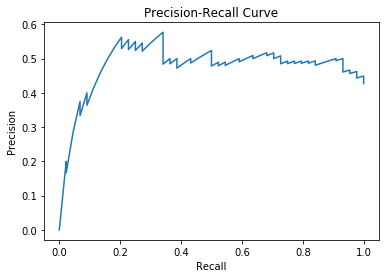

In [38]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(recall, precision)
plt.show()

In [39]:
precision_new=[]
for i in precision:
    if i!=0:
        precision_new.append(i)

In [41]:
precision_new.insert(0,1)

In [42]:
print(precision_new)

[1, 0.2, 0.16666666666666666, 0.2857142857142857, 0.375, 0.3333333333333333, 0.4, 0.36363636363636365, 0.4166666666666667, 0.46153846153846156, 0.5, 0.5333333333333333, 0.5625, 0.5294117647058824, 0.5555555555555556, 0.5263157894736842, 0.55, 0.5238095238095238, 0.5454545454545454, 0.5217391304347826, 0.5416666666666666, 0.56, 0.5769230769230769, 0.5555555555555556, 0.5357142857142857, 0.5172413793103449, 0.5, 0.4838709677419355, 0.5, 0.48484848484848486, 0.5, 0.4857142857142857, 0.4722222222222222, 0.4864864864864865, 0.5, 0.48717948717948717, 0.5, 0.5121951219512195, 0.5238095238095238, 0.5116279069767442, 0.5, 0.4888888888888889, 0.4782608695652174, 0.48936170212765956, 0.4791666666666667, 0.4897959183673469, 0.48, 0.49019607843137253, 0.5, 0.49056603773584906, 0.5, 0.509090909090909, 0.5, 0.5087719298245614, 0.5172413793103449, 0.5084745762711864, 0.5166666666666667, 0.5081967213114754, 0.5, 0.5079365079365079, 0.5, 0.49230769230769234, 0.48484848484848486, 0.4925373134328358, 0.48

In [43]:
recall_new = []
for i in recall:
    if i!=0:
        recall_new.append(i)

In [46]:
recall_new.insert(0,0)

In [47]:
print(recall_new)

[0, 0.022727272727272728, 0.022727272727272728, 0.045454545454545456, 0.06818181818181818, 0.06818181818181818, 0.09090909090909091, 0.09090909090909091, 0.11363636363636363, 0.13636363636363635, 0.1590909090909091, 0.18181818181818182, 0.20454545454545456, 0.20454545454545456, 0.22727272727272727, 0.22727272727272727, 0.25, 0.25, 0.2727272727272727, 0.2727272727272727, 0.29545454545454547, 0.3181818181818182, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.36363636363636365, 0.36363636363636365, 0.38636363636363635, 0.38636363636363635, 0.38636363636363635, 0.4090909090909091, 0.4318181818181818, 0.4318181818181818, 0.45454545454545453, 0.4772727272727273, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6590909090909091, 0.6818181818181

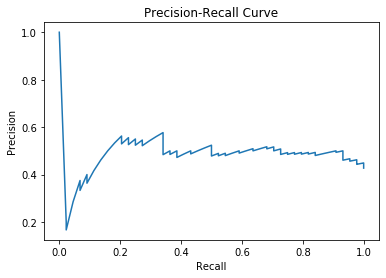

In [48]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(recall_new, precision_new)
plt.show()